In [ ]:
# define mdp
# act with random policy
# plot state values and action state values
# show that bellmann equation holds

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import trange, tqdm

from utils import MDPEnv, ReturnTracker

%config InlineBackend.figure_formats = ['svg']


<div>
<img src="figures/MDP.png" width="600"/>
</div>


In [4]:
def run_mdp(env, episodes, steps, init_state=None, verb=True):

    tracker = ReturnTracker()
    if verb:
        iterator = trange(episodes)
    else:
        iterator = range(episodes)
    for _ in iterator:
        tracker.new_episode()
        observation, info = env.reset(init_state)
        for _ in range(steps):
            observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
            tracker.add(reward)
    if verb:
        tracker.plot('starting state = {}'.format(init_state), smooth=10)
    env.close()
    if verb:
        print('average return for starting state {} after {} steps: {}'.format(init_state, steps, tracker.average()))
    else:
        return tracker.average()  

  0%|          | 0/1000 [00:00<?, ?it/s]

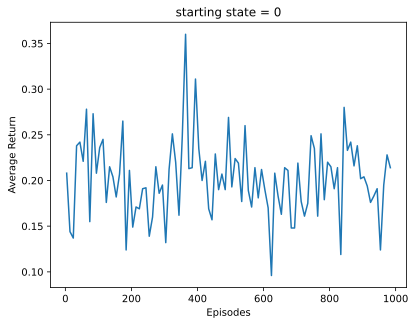

average return for starting state 0 after 100 steps: 0.20144144144144144


  0%|          | 0/1000 [00:00<?, ?it/s]

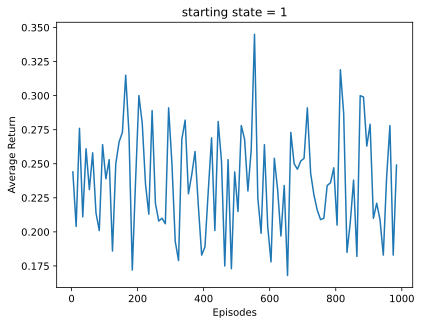

average return for starting state 1 after 100 steps: 0.2372872872872873


  0%|          | 0/1000 [00:00<?, ?it/s]

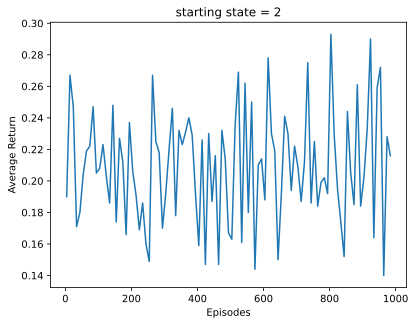

average return for starting state 2 after 100 steps: 0.20947947947947948


In [5]:
episodes = 1000
steps = 100

env = MDPEnv()

for init_state in range(3):
    run_mdp(env, episodes, steps, init_state, verb=True)


In [9]:
episodes = 100
steps = np.array(np.ceil(np.logspace(0,2.5,10)), dtype=int)
avg_returns = np.zeros((10,3,episodes))

env = MDPEnv()

for i, steps_ in tqdm(enumerate(steps), total=len(steps)):
    for init_state in range(3):
        avg_returns[i,init_state] = run_mdp(env, episodes, steps_, init_state, verb=False)


  0%|          | 0/10 [00:00<?, ?it/s]

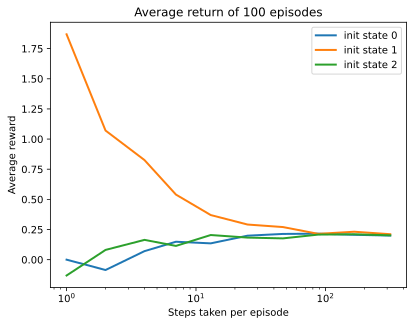

In [10]:
for init_state in range(3):
    plt.plot(steps, np.mean(avg_returns[:, init_state], axis=-1), label='init state {}'.format(init_state), linewidth=2)
plt.xscale('log')
plt.legend()
plt.title('Average return of {} episodes'.format(episodes))
plt.xlabel('Steps taken per episode')
plt.ylabel('Average reward')
plt.show()

In [11]:
# the Bellman equations for this MDP, for a random policy, can be simplified to this system

for gamma in [0, 0.3, 0.5, 0.7, 0.9, 0.99, 0.999999]:

    X = np.array([[1-0.25*gamma, 0, -0.75*gamma],
                  [-0.35*gamma, 1-0.525*gamma, -0.125*gamma],
                  [-0.35*gamma, -0.15, 1-0.5*gamma]])

    y = np.array([0, 1.75, -0.15])

    state_values = np.dot(np.linalg.inv(X), y)
    print('gamma {}: {}, divided by 1/(1 - gamma): {}'.format(gamma, state_values, state_values*(1 - gamma)))



gamma 0: [0.     1.75   0.1125], divided by 1/(1 - gamma): [0.     1.75   0.1125]
gamma 0.3: [0.04832728 2.09201759 0.19867883], divided by 1/(1 - gamma): [0.0338291  1.46441231 0.13907518]
gamma 0.5: [0.13640191 2.43222004 0.31827112], divided by 1/(1 - gamma): [0.06820095 1.21611002 0.15913556]
gamma 0.7: [0.38648556 3.00052289 0.60733446], divided by 1/(1 - gamma): [0.11594567 0.90015687 0.18220034]
gamma 0.9: [1.82791928 4.856684   2.09872213], divided by 1/(1 - gamma): [0.18279193 0.4856684  0.20987221]
gamma 0.99: [22.15073846 25.41031266 22.4490649 ], divided by 1/(1 - gamma): [0.22150738 0.25410313 0.22449065]
gamma 0.999999: [226219.33701716 226222.62434802 226219.63864324], divided by 1/(1 - gamma): [0.22621934 0.22622262 0.22621964]
